**Nhóm: Anadata**

***Thành viên:***

- 20120089 - Lê Xuân Hoàng
- 20120422 - Nguyễn Thị Ánh Tuyết
- 20120460 - Lê Nguyễn Hải Dương
- 20120494 - Lê Xuân Huy
- 20120521 - Trần Thị Phương Linh

# Đóng khung vấn đề



Bài toán này yêu cầu dự đoán giá cuối cùng của mỗi căn nhà dựa trên 79 biến mô tả (hầu như) mọi khía cạnh của các căn nhà ở Ames, Iowa. Bài toán được giao trong một cuộc thi tìm hiểu về dữ liệu, nơi mà những yếu tố khác ngoài số lượng phòng ngủ hoặc hàng rào trắng được chọn để ảnh hưởng đến thương lượng giá.

# Thu thập dữ liệu

Trong thư mục của cuộc thi này, có các tệp tin sau:

1. train.csv: Đây là tập dữ liệu huấn luyện, được sử dụng để xây dựng mô hình dự đoán giá nhà. Tệp này chứa thông tin về các căn nhà, bao gồm các biến giải thích và giá cuối cùng của từng căn nhà.

2. test.csv: Đây là tập dữ liệu kiểm tra, được sử dụng để đánh giá hiệu suất của mô hình dự đoán. Tệp này cũng chứa thông tin về các căn nhà, nhưng không có giá cuối cùng. Mục tiêu là dự đoán giá của các căn nhà này bằng mô hình đã huấn luyện trên tập train.csv.

3. data_description.txt: Đây là tệp mô tả đầy đủ về từng cột dữ liệu trong tập dữ liệu. Ban đầu, tệp này được chuẩn bị bởi Dean De Cock, nhưng đã được chỉnh sửa nhẹ để phù hợp với tên các cột được sử dụng trong cuộc thi này. Tệp này cung cấp thông tin chi tiết về các biến giải thích và giải thích ý nghĩa của chúng.

4. sample_submission.csv: Đây là một tệp nộp mẫu, chứa một mẫu nộp đơn dùng làm tham khảo để tạo ra định dạng chính xác cho kết quả dự đoán trên tập test.csv.

# Khám phá và tiền xử lý

Import các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

pd.set_option('display.max_columns', None)

Đọc dữ liệu từ tập train và test

In [ ]:
train_df = pd.read_csv('train.csv')

y = np.log1p(train_df['SalePrice']) #Gán dữ liệu y bởi cột SalePrice
train_df = train_df.drop(["SalePrice"], axis = 1)

test_df = pd.read_csv('test.csv')
id_test = test_df.Id

Gộp train và test để thuận tiện cho việc tiền xử lý

In [ ]:
df = pd.concat([train_df, test_df])
df = df.drop(["Id"], axis = 1) #Bỏ cột Id

Hiển thị thông tin chung của các cột (tên, số lượng giá trị khác null, kiểu dữ liệu)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

**Ý nghĩa từng cột:**
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Khám phá dữ liệu
Lấy ra các cột numerical và trực quan hóa dữ liệu

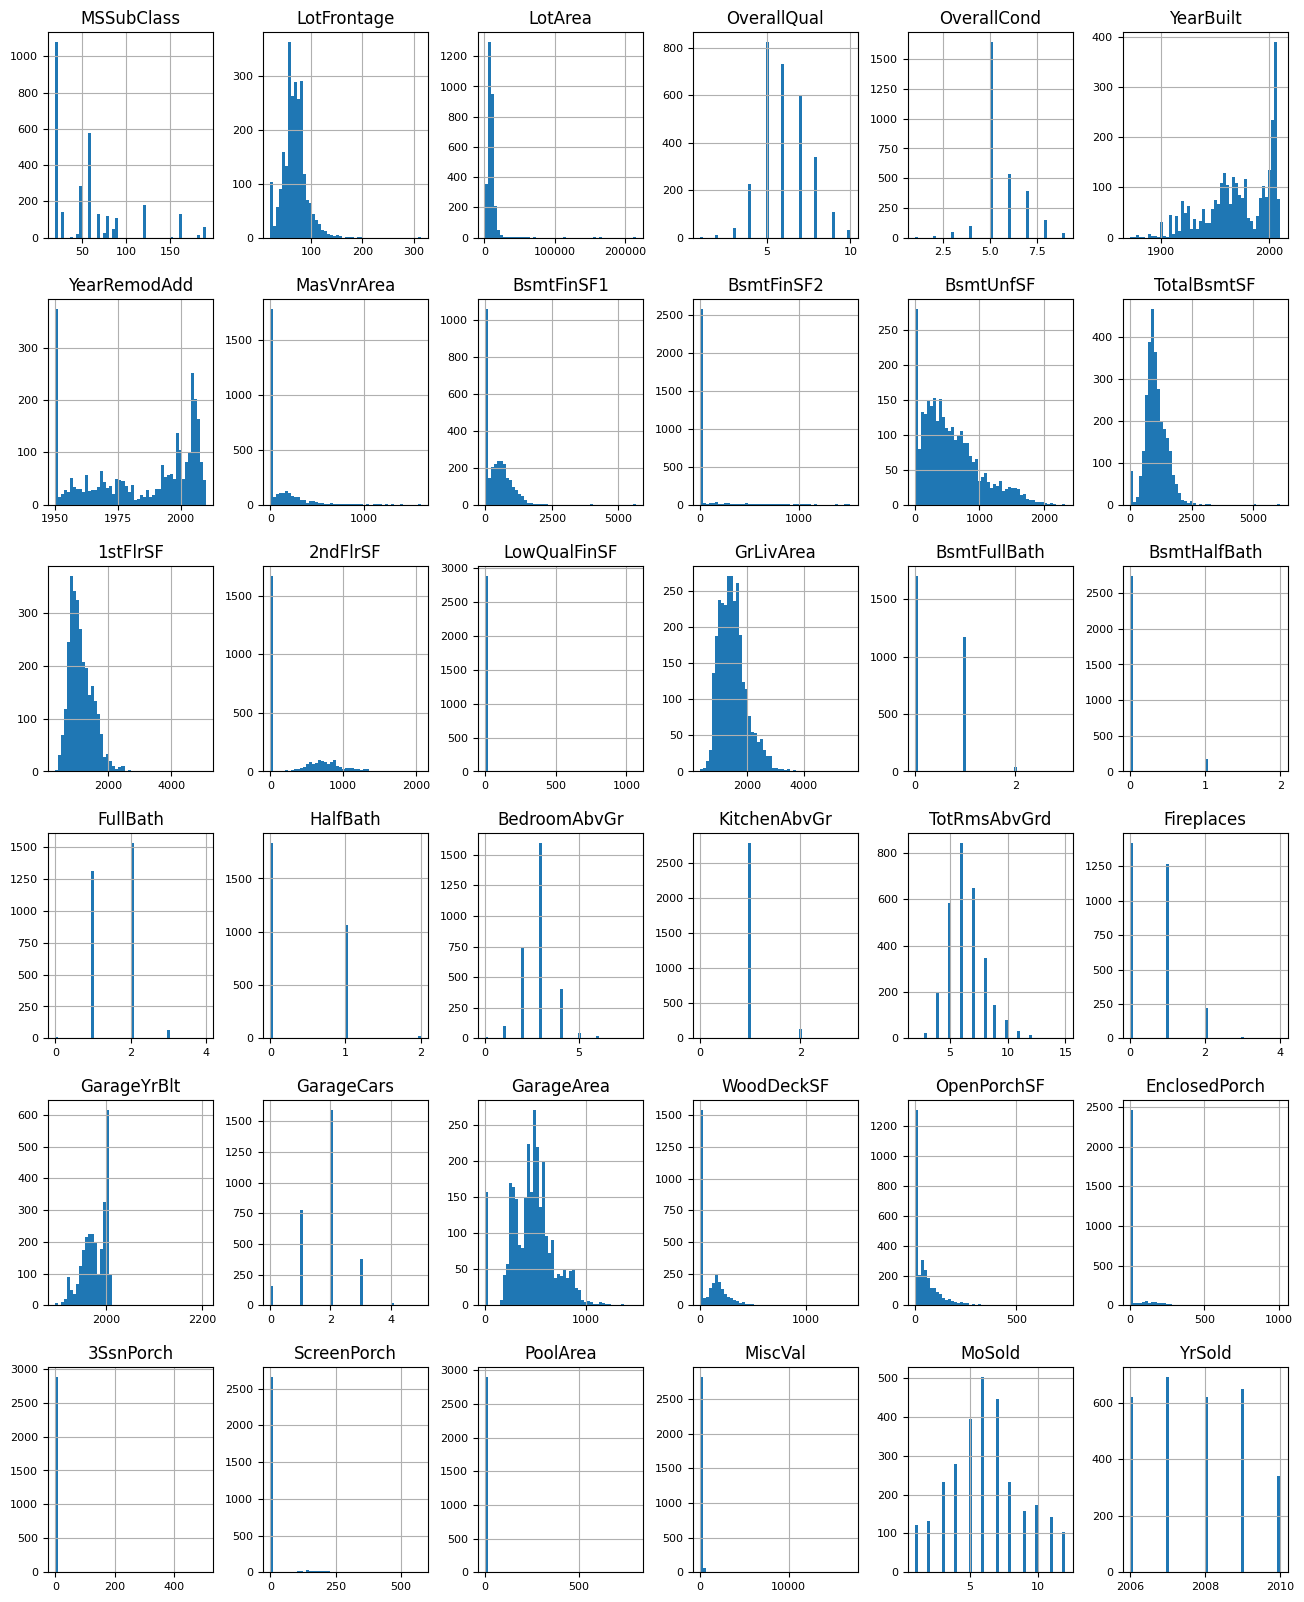

In [ ]:
num_df = df.select_dtypes(include='number')
num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Nhìn vào đây, ta có thể thấy rằng một số cột bị thưa (PoolArea, MiscVal, ScreenPorch, 3SsnPorch,...), một số cột bị lệch hẳn về một bên (GrLiveArea, LotFrontage,...), gây khó khăn cho việc dự đoán.

## Xử lý dữ liệu bị thiếu
Đầu tiên ta tiến hành lấy ra những cột có chứa giá trị thiếu đồng thời tính tỉ lệ thiếu của từng cột và trực quan hóa bằng biểu đồ cột

TotalBsmtSF      0.034258
GarageArea       0.034258
GarageCars       0.034258
KitchenQual      0.034258
Electrical       0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
Functional       0.068517
Utilities        0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
MSZoning         0.137033
MasVnrArea       0.787941
MasVnrType       0.822199
BsmtFinType1     2.706406
BsmtFinType2     2.740665
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
GarageType       5.378554
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
LotFrontage     16.649538
FireplaceQu     48.646797
Fence           80.438506
Alley           93.216855
MiscFeature     96.402878
PoolQC          99.657417
dtype: float64

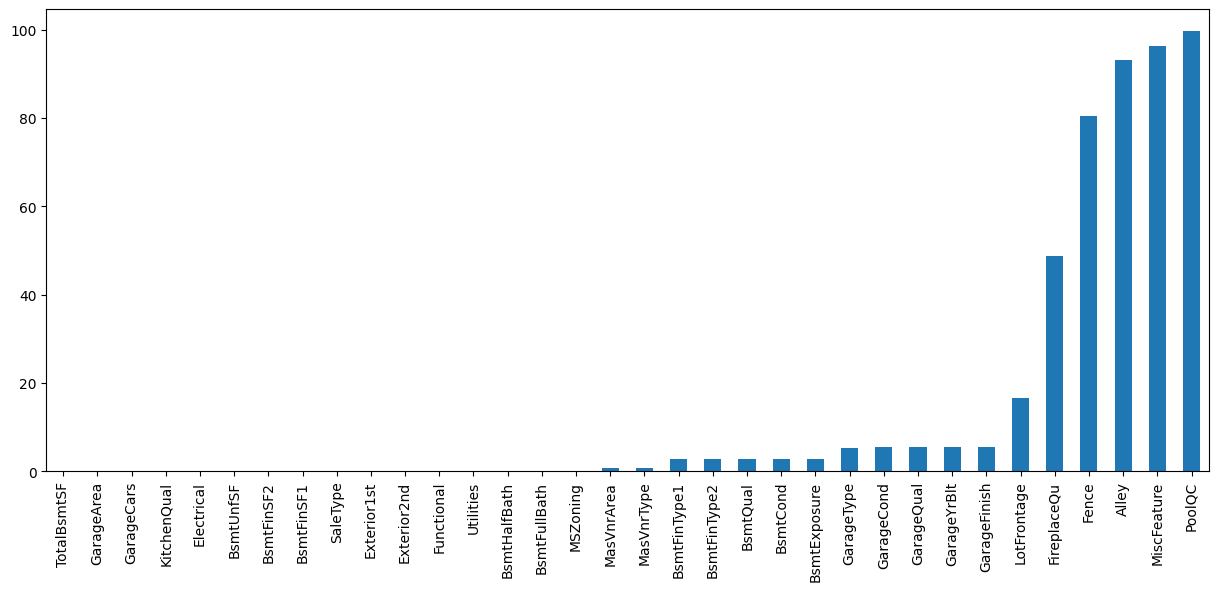

In [ ]:
missing_cols = df.columns[df.isnull().any()]
plt.subplots(figsize=(15, 6))
missing_ratio = df[missing_cols].isnull().sum() * 100 / len(df)
missing_ratio.sort_values(inplace=True)
missing_ratio.plot.bar(missing_ratio)
missing_ratio

Ta thấy có một số cột có tỉ lệ thiếu chiếm rất lớn, nên ta sẽ bỏ những cột này đi

In [ ]:
drop_col = missing_ratio[missing_ratio.values > 80].index
df = df.drop(drop_col, axis=1)
df.shape

(2919, 75)

In [ ]:
missing_cols = [i for i in missing_cols if i not in drop_col]

Sau khi đã bỏ những cột trên, ta tiếp tục xử lý với các cột bị thiếu còn lại

In [ ]:
df[missing_cols]

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
0,RL,65.0,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,WD
1,RL,80.0,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,SBrkr,0.0,1.0,TA,Typ,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,WD
2,RL,68.0,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,WD
3,RL,60.0,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,SBrkr,1.0,0.0,Gd,Typ,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,WD
4,RL,84.0,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,SBrkr,0.0,0.0,TA,Typ,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD
1455,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,SBrkr,0.0,0.0,TA,Typ,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,WD
1456,RL,160.0,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,SBrkr,1.0,0.0,TA,Typ,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,WD
1457,RL,62.0,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,SBrkr,0.0,1.0,TA,Typ,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD


- Đối với các cột numerical có giá trị thiếu (NA), ta tiến hành thay thế giá trị này bằng mean
- Đối với các cột categorical, ta sử dụng one-hot-encoding để xử lý

Xử lý cột numerical bị thiếu (thay bằng giá trị mean)

In [ ]:
df = df.fillna(df.mean())

<ipython-input-15-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


## Data normalize

Để chuẩn hóa phân phối lệch về phân phối chuẩn, ta sử dụng hàm biến đổi logarith bằng cách thêm 1 cho mỗi đặc trưng và sau đó lấy logarith tự nhiên.

In [ ]:
# Get the index of numeric features in all_data
numeric_feats = df.select_dtypes(include=np.number).columns

# Compute the skewness of each numeric feature
skewness = df[numeric_feats].apply(lambda x: skew(x.dropna()))

# Select the skewed features with skewness > 0.75
skewed_feats = skewness[skewness > 0.75].index

# Log transform the skewed features using np.log1p
df[skewed_feats] = np.log1p(df[skewed_feats])

## One-hot encoding

In [ ]:
df = pd.get_dummies(df)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,

In [ ]:
df.isnull().values.any()

False

Không còn giá trị thiếu (NA) nữa

**Chia tập dữ liệu thành tập train và test**

Đầu tiên, chúng ta chia data thành các tập train và test vì bước ở trên chúng ta gộp 2 tập này vào chung 1 dataframe để tiền xử lí.

In [ ]:
X_train = df.iloc[:train_df.shape[0], :]
X_test = df.iloc[train_df.shape[0]:, :]

Tuy nhiên, chúng ta cần thêm 1 tập validation để  điều chỉnh hiệu suất và đánh giá trong quá trình huấn luyện, nên cần chia tập X_train thành 2 tập con nữa:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y, test_size=0.2, random_state=120)

**Tiếp theo, chúng ta import các model của sklearn và tìm hiểu về RMSE.**

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

**RMSE là gì?**
- RMSE là viết tắt của "Root Mean Squared Error" và là một phép đo đánh giá độ chính xác của mô hình hồi quy. Nó được sử dụng để đo lường mức độ sai lệch giữa giá trị dự đoán của mô hình và giá trị thực tế của biến phụ thuộc.

- RMSE được tính bằng cách lấy căn bậc hai của trung bình bình phương sai số (residuals) giữa giá trị dự đoán và giá trị thực tế.

- Thay vì chỉ tính toán RMSE trên tập kiểm tra cuối cùng, rmse_cv tính toán RMSE cho mỗi fold trong quá trình cross-validation và trả về một mảng các giá trị RMSE cho từng fold.

**Cross_val_score là gì?**

- Hàm này dùng để đánh giá hiệu suất của mô hình học máy thông qua kỹ thuật cross-validation.

- Ở đây, chúng ta chọn `cv = 5` để chia dữ liệu thành 5 tập con bằng nhau và mỗi lần sẽ lấy 1 tập con để đánh giá hiệu quả của model đã được train dựa trên 4 tập còn lại.

- Chúng ta chọn tham số scoring là "neg_mean_squared_error" (trung bình của bình phương sai số).


In [ ]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# Tìm hiểu và chạy model



*   Sau khi khám phá, dữ liệu có rất nhiều cột (hơn 250 cột) nên khi sử dụng model rất dễ bị overfitting.
*   Overfitting là hiện tượng mô hình quá khít với dữ liệu, nó sẽ đúng trên tập training nhưng không đúng trên tập test.
*   Có nhiều kĩ thuật để tránh bị overfitting như là thu thập thêm dữ liệu, early stopping, use dropout, regularization,...
*   **Regularization** là một trong những giải pháp hiệu quả để giải quyết overfitting nhưng vẫn giữ nguyên tính bao quát của thuật toán (không cần phải loại bỏ bất kì feature nào của training set).



## Regularization và Lasso model

- Lasso là phương pháp regularization được sử dụng trong mô hình hồi quy tuyến tính.
- Dữ liệu có hơn 250 features, nên sử dụng model Lasso là hợp lí vì Lasso có khả năng lựa chọn đặc trưng quan trọng và loại bỏ các biến không quan trọng hoàn toàn bằng cách đặt hệ số của chúng bằng 0, giúp mô hình dự đoán giá nhà trở nên đơn giản và tối ưu hơn.

**Tham số alpha (hoặc là lambda) trong mô hình Lasso:**
*   Khi λ = 0, tức là không có regularization, chúng ta quay trở về bài toán hồi qui tuyến tính. Ta nhận thấy gần như toàn bộ dữ liệu trong tập training được phân lớp đúng. Việc này khiến cho các class bị phân làm nhiều mảnh không được tự nhiên.
*   Khi λ = 0.001, các đường phân chia trông tự nhiên hơn, nhưng lớp màu xanh lam vẫn bị chia làm hai bởi lớp màu xanh lục. Đây chính là biểu hiện của overfitting.
*   Khi λ tăng lên, tức sự ảnh hưởng của regularization tăng lên, đường ranh giới giữa các lớp trở lên tự nhiên hơn.
(Hình minh hoạ cho sự thay đổi của tham số alpha)





![picture](https://drive.google.com/uc?id=1iWw17Xdc9ZjSsFLLE0mtoDFxk8pddMo8)

(Hình minh hoạ cho sự thay đổi của tham số alpha)





## Thực hành áp dụng mô hình lasso

Sử dụng LassoCV với từng siêu tham số alpha


In [ ]:
#alpha ở đâu ra?? => Thử từng giá trị alpha phố biến giá trị nào tốt nhất thì chọn
model_lasso = LassoCV(alphas = [0.1, 0.001, 0.0001, 0.0005]).fit(X_train, y_train)

Tính độ lỗi rmse trung bình dựa trên phương pháp đánh giá K-folds (hay k-fold cross-validation)

In [ ]:
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2323201213069659, tolerance: 0.011739931033182164
  model = cd_fast.enet_coordinate_descent_gram(


0.13311722545349694

Ta có được độ lỗi cho mô hình Lasso là 0.13311

Thực hiện predict trên tập validation

In [ ]:
### Predict
y_pred_lasso = model_lasso.predict(X_validation)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred_lasso))
rmse

0.103707274674409

## Ensemble learning

- Ensemble learning lầ một phương pháp để kết hợp các mô hình dự đoán đơn lẽ thành một mô hình mạnh hơn, thường được áp dụng trong nhiều bài toán machine learning như phân loại, hồi quy và phát hiện bất thường.
- Mục đích chính của ensemble learning là tăng tính chính xác và khả năng tổng quát hóa của mô hình. Khi các mô hình độc lập có xu hướng mắc các sai lầm khác nhau, việc kết hợp chúng có thể giúp giảm thiểu sai lầm và tăng độ tin cậy của dự đoán. Điều này đặc biệt hữu ích khi các mô hình đơn lẻ có xu hướng phân loại sai khác nhau hoặc khi chúng bị ảnh hưởng bởi nhiễu hoặc dữ liệu nhiều biến
- **Bagging, boosting** và **stacking** là ba phương pháp phổ biến trong ensemble learning để kết hợp các mô hình thành viên.

![picture](https://drive.google.com/uc?id=1eiS6kTwAirhD1KC_-gdnZNSx9KdjDszM)


## Mô hình xgboost

- **Thuật toán Boosting trong Ensemble Learning**: được xây dựng bằng một chuỗi các models. Trong đó model sau sẽ dựa trên những gì model trước đã học để dự đoán, các trọng số được update qua mỗi model. Kết quả trả về là kết quả dự đoán của model cuối cùng trong chuỗi.

![picture](https://drive.google.com/uc?id=15A2LiW-bK_VM2aI-_jf8yv8u6FlfBn1d)

(Nguồn: www.pluralsight.com)

- **XGBoost (Extreme Gradient Boosting)**: Là một thuật toán boosting được cải tiến từ thuật toán Gradient Boosting. Nó kết hợp nhiều cây quyết định nhằm tạo ra một mô hình dự đoán mạnh mẽ hơn.
- XGBoost thường được sử dụng khi có tập dữ liệu có nhiều đặc trưng hoặc lượng dữ liệu lớn. Nó hiệu quả trong việc xử lý các bài toán dự đoán, phân loại và hồi quy.

In [ ]:
import xgboost as xgb

Sử dụng xgb.cv để tìm tham số tốt nhất

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":6, "eta":0.1 }
model = xgb.cv(params, dtrain,  num_boost_round=1000, early_stopping_rounds=100)

In [ ]:
best_iteration = model.shape[0]
print("Số lượng vòng lặp tốt nhất: ", best_iteration)


Số lượng vòng lặp tốt nhất:  144


<Axes: >

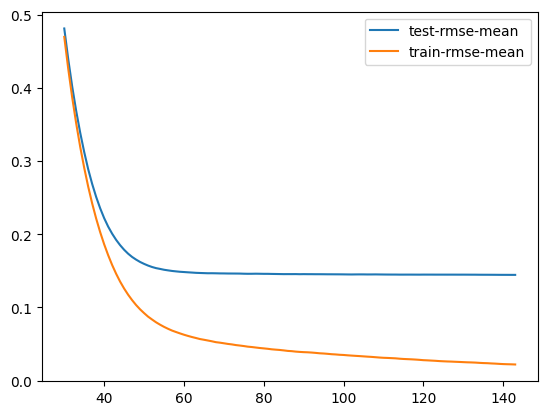

In [ ]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

Chạy mô hình với tham số tốt nhất

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=best_iteration)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=144, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Thực hiện predict trên tập validation

In [ ]:
####
from sklearn.metrics import mean_squared_error

y_pred = model_xgb.predict(X_validation)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
rmse

0.12207820347547575

## Kết hợp 2 mô hình

Môĩ mô hình đều có ưu điểm và nhược điểm của mình, sau đây là lý do chính để kết hợp
- Lasso: Tránh được hiện tượng overfitting. Mô hình này có khả năng loại bỏ các biến không quan trọng, giúp giảm độ phức tạp mô hình, tuy nhiên nhạy cảm với dữ liệu bị nhiễu
- XGBoost: Xử lý tốt trên các tập dữ liệu lớn và có giá trị nhiễu nhưng không có khả năng loại bỏ các biến không quan trọng, nếu mô hình sử dụng các biến này, nó  không chỉ tăng độ phức tạp mô hình mà còn có thể dẫn đến overfitting

=> Kết hợp 2 mô hình sẽ giúp cải thiện các nhược điểm này.

### Xác định hệ số kết hợp

Thử từng hệ số tư 0.1 - 1 rồi predict trên tập validation, sau đó tìm độ lỗi rmse xem hệ số nào tốt nhất.

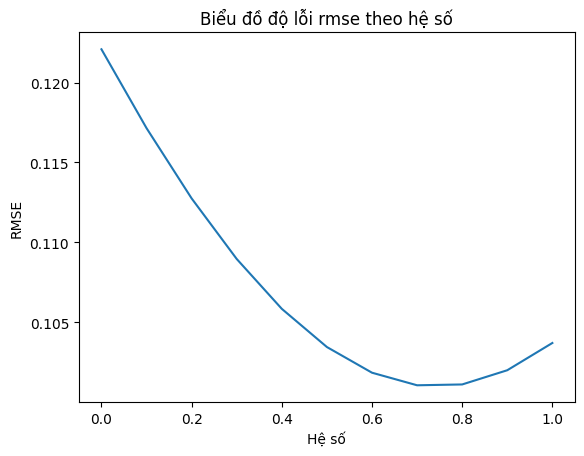

[0.12207820347547575,
 0.11714423747436993,
 0.11275012669924944,
 0.10896108769815344,
 0.10584214138239847,
 0.10345391258957928,
 0.10184782493729935,
 0.10106118321174956,
 0.10111310625806368,
 0.10200231526762518,
 0.103707274674409]

In [ ]:
from sklearn.metrics import mean_squared_error

coeffs = np.arange(0, 1.1, 0.1)

xgb_preds = model_xgb.predict(X_validation)
lasso_preds = model_lasso.predict(X_validation)

scores = []

for coeff in coeffs:
    combined_preds = coeff * lasso_preds + (1 - coeff) * xgb_preds
    rmse_score = np.sqrt(mean_squared_error(y_validation, combined_preds))
    scores.append(rmse_score)

plt.plot(coeffs, scores)
plt.xlabel("Hệ số")
plt.ylabel("RMSE")
plt.title("Biểu đồ độ lỗi rmse theo hệ số")
plt.show()
scores

Sau khi có các siêu tham số, cho mô hình học lại với tất cả dữ liệu


In [ ]:
X_train = pd.concat([X_train, X_validation])
y_train = pd.concat([y_train, y_validation])

model_xgb = xgb.XGBRegressor(n_estimators=best_iteration, max_depth = 6, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

model_lasso = LassoCV(alphas = [0.1, 0.01, 0.001, 0.0005]).fit(X_train, y_train)

xgb_preds = model_xgb.predict(X_test)
lasso_preds = model_lasso.predict(X_test)

In [ ]:
preds = np.expm1(0.7*lasso_preds + 0.3*xgb_preds)

Độ lỗi rmse của bài này được tính bằng độ lỗi của logarit của kết quả predict, vì vậy ban đầu chúng ta đã lấy logarit cột SalePrice để tiện hơn trong quá trình tính toán. Vì vậy bây giờ chúng ta phải lũy thừa lên lại trước khi submit kết quả.

In [ ]:
solution = pd.DataFrame({"id":id_test.values, "SalePrice":preds})
solution.to_csv("submission.csv", index = False)

# Kết quả submit trên kaggle
Score: 0.12165

Top:  357/4698 (8%)

![picture](https://drive.google.com/uc?id=1XZGyqtcTv2GE52h6U3m5tO6qE_5aItQi)

**Nguồn tham khảo:**

- https://www.kaggle.com/code/apapiu/regularized-linear-models
- https://machinelearningcoban.com/2017/03/04/overfitting/
- https://www.youtube.com/watch?v=fAPZ21l3cG4&t=7s
- https://www.pluralsight.com
